# COMP 755

Plan for today

1. Sparsity
2. Sparse Linear Regression
3. Sparsity promoting priors and penalties


$$
\renewcommand{\vvec}[2]{\left[ \begin{array}{c} \mathbf{#1}\\ \mathbf{#2} \end{array}\right]}
\renewcommand{\mmat}[4]{\left[ \begin{array}{cc} \mathbf{#1}&\mathbf{#2}\\ \mathbf{#3}&\mathbf{#4} \end{array}\right]}
\renewcommand{\aaa}{\mathbf{a}}
\renewcommand{\AAA}{\mathbf{A}}
\renewcommand{\xyvec}{\left[ \begin{array}{c} \xx\\\yy \end{array} \right]}
\renewcommand{\xyvecc}{\left[ \begin{array}{c} x^1\\y^1 \end{array} \right]}
\renewcommand{\mm}{\mathbf{m}}
\renewcommand{\xx}{\mathbf{x}}
\renewcommand{\yy}{\mathbf{y}}
\renewcommand{\zz}{\mathbf{z}}
\renewcommand{\vv}{\mathbf{v}}
\renewcommand{\ee}{\mathbf{e}}
\renewcommand{\ww}{\mathbf{w}}
\renewcommand{\XX}{\mathbf{X}}
\renewcommand{\YY}{\mathbf{Y}}
\renewcommand{\WW}{\mathbf{W}}
\renewcommand{\VV}{\mathbf{V}}
\renewcommand{\DD}{\mathbf{D}}
\renewcommand{\dd}{\mathbf{d}}
\renewcommand{\ZZ}{\mathbf{Z}}
\renewcommand{\CC}{\mathbf{C}}
\renewcommand{\bbeta}{\boldsymbol{\mathbf{\beta}}}
\renewcommand{\mmu}{\boldsymbol{\mathbf{\mu}}}
\renewcommand{\ssigma}{\boldsymbol{\mathbf{\sigma}}}
\renewcommand{\reals}{\mathbb{R}}
\renewcommand{\loglik}{\mathcal{LL}}
\renewcommand{\penloglik}{\mathcal{PLL}}
\renewcommand{\likelihood}{\mathcal{L}}
\renewcommand{\Data}{\textrm{Data}}
\renewcommand{\given}{ \big| }
\renewcommand{\MLE}{\textrm{MLE}}
\renewcommand{\EE}{\mathbb{E}}
\renewcommand{\EEE}{\mathbf{E}}
\renewcommand{\KL}{\textrm{KL}}
\renewcommand{\Bound}{\mathcal{B}}
\renewcommand{\tth}{\textrm{th}}
\renewcommand{\Gaussian}[2]{\mathcal{N}\left(#1,#2\right)}
\renewcommand{\norm}[1]{\left\lVert#1\right\rVert}
\renewcommand{\ones}{\mathbf{1}}
\renewcommand{\corr}[2]{\textrm{corr}(#1,#2)}
\renewcommand{\diag}[1]{\textrm{diag}\left( #1 \right)}
\renewcommand{\sigmoid}[1]{\sigma\left(#1\right)}
\renewcommand{\myexp}[1]{\exp\left\{#1\right\}}
\renewcommand{\mylog}[1]{\log\left\{#1\right\}}
\renewcommand{\argmax}{\mathop{\textrm{argmax}}}
\renewcommand{\new}{\textrm{new}}
\renewcommand{\old}{\textrm{old}}
\renewcommand{\bb}{\mathbf{b}}
\renewcommand{\ba}{\mathbf{a}}
\renewcommand{\BB}{\mathbf{B}}
\renewcommand{\BA}{\mathbf{A}}
\renewcommand{\BC}{\mathbf{C}}
\renewcommand{\UU}{\mathbf{U}}
\renewcommand{\uu}{\mathbf{u}}
\renewcommand{\SSS}{\mathbf{S}}
\renewcommand{\sss}{\mathbf{s}}
\renewcommand{\tr}[1]{\textrm{tr}\left\{#1\right\}}
\renewcommand{\argmin}{\mathop{\textrm{argmin}}}
\renewcommand{\abs}[1]{\left\lvert#1\right\rvert}
\renewcommand{\sign}{\textrm{sign}}
$$

In [1]:
 def draw_contours(b1s,b2s,objective,n=40):
    B1s, B2s = np.meshgrid(b1s,b2s)
    O = np.zeros((len(b1s),len(b2s)))
    for (i,b1) in enumerate(b1s):
        for (j,b2) in enumerate(b2s):
            beta = np.asarray([[b1],[b2]])
            O[i,j] = objective(beta)
    plt.contour(B1s,B2s,O,n)  


# Sparsity

In machine learning, a vector is called **sparse** is most of its entries are zero.

This concept generalizes to matrices and tensors (n-dimensional arrays).

Benefits of sparsity in vectors:
1. easy to store -- indices for non-zero entries and the corresponding values
  * ```[-0.1, 0, 0.5, 0, 0, 0]``` can be stored as  ```[ (0,-0.1), (2,0.5) ]```
2. inexpensive to compute with 
  * computation of inner product  only uses non-zero entries
      $[-0.1, 0, 0.5, 0, 0 ,0]* \xx = -0.1x_1 + 0.5x_3$
3. easy to understand and interpret
  * a vector of length 100 with 3 non-zero entries has only 3 interesting values

Note: When we talk about zero entries, we mean equal to 0 rather than just small (for example $10^{-5}$).

# Sparsity

Data is sparse

* Bag-of-words representations of text
  * a text document contains a small fraction of the words in a dictionary
  
| Document Name | aachen | aardvark |  ... | king | ... |
| --- | --- |  --- | --- |  --- | --- |
| "Consitution of the USA" | 0 | 0 |  ... | 2 | ... | 
| "A Song of Ice and Fire" | 0 | 0 | ... | 4083 | ... |  
| "Arthur's Spelling Trubble" | 0 | 1 | ... | 0 | ... |
* Online purchase history
  * Amazon sells >200 million products -- single user's purchase vector is sparse
  * An average Netflix user did not stream all the movies available
  

**Q: Say you have a sparse data matrix. Does standardization -- subtract mean, divide by standard devation -- of a feature preserve sparsity?**

# Sparsity in linear regression

Model's parameters can also be sparse.

Assume a model 
\begin{eqnarray*}
y &\sim& \mathcal{N}(\xx^T\bbeta,1)
\end{eqnarray*}
where feature vector $\xx$ is $p$-long, and consequently $\beta$ is $p$-long.

If the learned $\bbeta$ is sparse, say $\beta_3$ is non-zero and rest of the values are zero then
\begin{eqnarray*}
y &\sim& \mathcal{N}(x_3\beta_3,1).
\end{eqnarray*}
and for a new sample $\xx^{\textrm{new}}$ we can predict 
$$
\hat{y}^\new = \beta_3x_3^\new
$$

Observations:
1. In prediction, instead of $p$ multiplications and sums, we perform only one multiplication 
2. The model is very easy to explain -- we predict $y$ by scaling the third feature.
3. Given that we only learned one parameter -- $\beta_3$ -- it is unlikely that we overfit.


#  $p\gg n$ in linear regression

It is not unusal that we have more features than samples. 
* GoodReads: 395M  books(p) 11M members (n) 

Naively regressing a single book's ratings ($y: 11$ M $\times 1$ ) onto other books' ratings ($\XX: 11$ M $\times 395$ M) requires fitting $395$M parameters using only $11$M samples.

In this case, $p$ is much greater than $n$ ($p\gg n$) and the regression problem is ill-posed.

**Q: What can we do?**

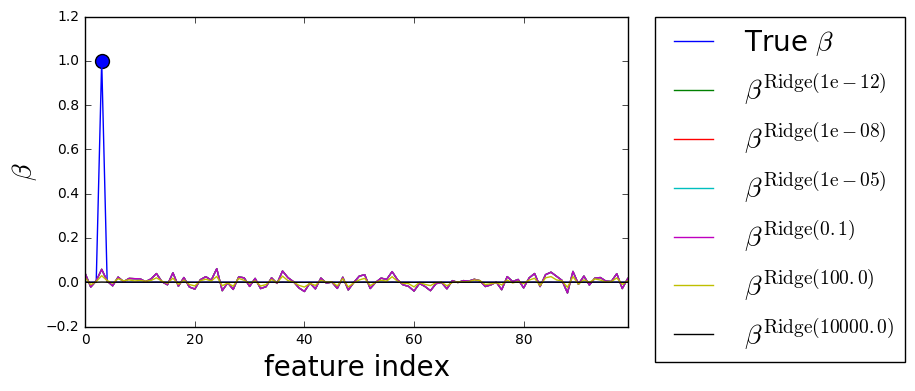

In [161]:
# a toy example
from sklearn.linear_model import Ridge, Lasso
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)
n = 10
p = 100
X = np.random.randn(n,p)
# use fourth feature
true_betas = np.zeros((p,1))
true_betas[3] = 1.0
y = 1.0*X[:,[3]] + 0.2*np.random.randn(n,1)

plt.figure(figsize=(7,4))

plt.plot(true_betas,label='True $\\beta$')
plt.scatter(3,true_betas[3],s=100)

for alpha in [1e-12,1e-8,1e-5,1e-1,1e+2,1e+4]:
    # objective is 1/2*||y - X*beta||^2 + alpha||beta||^2
    model = Ridge(alpha=alpha)
    model.fit(X,y)
    betas = model.coef_[0]
    plt.plot(betas,label = '$\\beta^{\\mathrm{Ridge(' + str(alpha) + ')}}$')
    
    
plt.xlabel('feature index',fontsize=20)
plt.ylabel('$\\beta$',fontsize=20);
plt.xlim([0,p-1])
plt.legend(scatterpoints = 1,fontsize=20,
           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


# The issue with Ridge Regularization

Ridge encourages $\beta$s to be smaller -- promotes **shrinkage** -- but the $\beta$s never become zero.

When $p\gg n$ ridge may have trouble finding good predictors.

This issue can be resolved with more data: $\beta_3$ is clearly dominant when we use 3 or 5 times as much data.
![](ridge_beta.png)



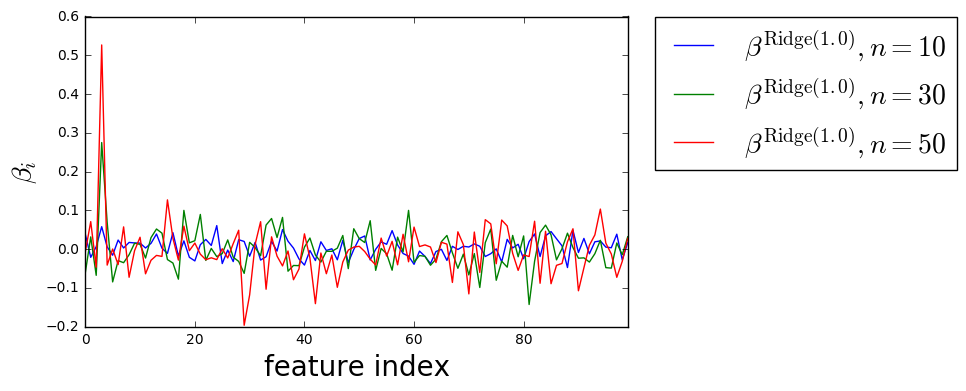

In [164]:
np.random.seed(0)
plt.figure(figsize=(7,4))
true_betas = np.zeros((p,1))
true_betas[3] = 1.0

for n in [10,30,50]:
    p = 100
    X = np.random.randn(n,p)
    # use fourth feature
    y = 1.0*X[:,[3]] + 0.2*np.random.randn(n,1)    
    model = Ridge(alpha=1.0)
    model.fit(X,y)
    betas = model.coef_[0]
    plt.plot(betas,label = '$\\beta^{\\mathrm{Ridge(1.0)}},n=' + str(n)+ '$')
    
    
plt.xlabel('feature index',fontsize=20)
plt.ylabel('$\\beta_i$',fontsize=20);
plt.xlim([0,p-1])
plt.legend(scatterpoints = 1, fontsize=20,
           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Sparsity in parameters

Optimization of ridge penalized linear regression objective
$$
\overbrace{\underbrace{\frac{1}{2}\norm{\yy - \XX\bbeta}_2^2}_{\textrm{Negative Log Likelihood}} + \underbrace{\frac{\alpha}{2}\sum_j\beta_j^2}_{\textrm{ridge penalty}}}^{\textrm{Ridge Regression}}
$$
does not produce sparse $\bbeta$.

We can consider other functions in place of ridge penalty
$$
\overbrace{\underbrace{\frac{1}{2}\norm{\yy - \XX\bbeta}_2^2}_{\textrm{Negative Log Likelihood}} + 
\underbrace{\lambda\sum_j \abs{\beta_j}}_{\ell_1 \textrm{ penalty}}}^{\textrm{LASSO regression}}.
$$

The name of the penalty stems from $\ell_1$ norm
$$
\norm{\zz}_1 = \sum_j \abs{z_j}.
$$
and **LASSO** stands for Least absolute shrinkage and selection operator.




# Level Curves of Penalties
Observations:
1. $x^2$ slope gets smaller as $x$ approaches zero
2. $\abs{x}$ slope is constant as $x$ approaches zero
3. $\ell_1$ is equal for $(0.5,0.5)$ and $(1.0,0.0)$
4. Ridge prefers $(0.5,0.5)$ to $(1.0,0)$

![](level_curves.png)

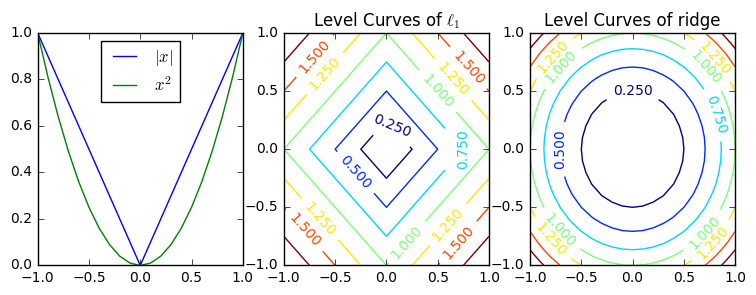

In [206]:
x = np.arange(-1.0, 1.01, 0.1)
y = np.arange(-1.0, 1.01, 0.1)
X, Y = np.meshgrid(x, y)
plt.figure(figsize=(9,3))
plt.subplot(1,3,1)
plt.plot(x,np.abs(x),label='$|x|$')
plt.plot(x,x**2.0,label='$x^2$')
plt.xlim([-1,1])
plt.ylim([0,1])
plt.legend(loc=9)

plt.subplot(1,3,2)
CS = plt.contour(X, Y, np.abs(X)+np.abs(Y))
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Level Curves of $\\ell_1$')
plt.subplot(1,3,3)
CS = plt.contour(X, Y, X**2.0+Y**2.0)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Level Curves of ridge')



# Geometric intuition

Red contours show $\bbeta$s that achieve the same value of negative log-likelihood: $\norm{\yy - \XX\bbeta}_2^2$.

Boundary of the green area are points that achieve the same penalty value.

The point of contact between the red curve and the green area is the optimal solution.

This point is more likely to be on axis -- one coordinate is zero -- in the case of a diamond than a circle.


![](penalty_regression.png)


# Solving for the optimal parameters

Optimizing 
$$
\frac{1}{2}\norm{\yy - \XX\bbeta}_2^2+ 
\lambda\sum_j \abs{\beta_j}
$$
is a bit tougher than optimization we have seen thus far.

We will first recap coordinate descent and then derive iterative algorithm to optimize this algorithm

# Gradient descent -- recap

Suppose you are trying to find
$$
\argmin_{\beta_1,\beta_2,\beta_3} f(\beta_1,\beta_2,\beta_3).
$$

You could compute gradient $\nabla_{\bbeta} f(\beta_1,\beta_2,\beta_3)$ and iterate updates
$$
\bbeta^{\new} = \bbeta^{\old} - \textrm{step}\nabla_{\bbeta} f(\beta^\old_1,\beta^\old_2,\beta^\old_3)
$$
carefully adjusting steps using a backtracking approach.

Note: minus sign here because we are minimizing -- going against the gradient.

# Coordinate descent

However, you could also use a simpler approach of updating single $\beta_i$ at a time

For example,

\begin{eqnarray*}
\beta_1^{\new} &=& \argmin_{\color{red}{\beta_1}} f(\color{red}{\beta_1},\beta^\old_2,\beta^\old_3) \\
\beta_2^{\new} &=& \argmin_{\color{red}{\beta_2}} f(\beta^{\new}_1,\color{red}{\beta_2},\beta^\old_3) \\
\beta_3^{\new} &=& \argmin_{\color{red}{\beta_3}} f(\beta^{\new}_1,\beta^{\new}_2,\color{red}{\beta_3}) \\
\end{eqnarray*}

and cycling these updates until the changes become small $\sum_j \abs{\beta_j^\new - \beta_j^\old} < \epsilon$

At each step, we update a variable to **optimal** value given the rest.

# Coordinate descent -- derivation procedure

1. Express objective in terms of a single variable ($\beta_k$) while keeping rest fixed
2. Compute partial derivative with respect to the variable
3. Equate the partial derivative zero and solve to obtain the update

# Coordinate descent -- warm-up on ridge regression

Objective 
$$
L(\beta_1,..,\beta_p) = \frac{1}{2}\underbrace{\sum_{t=1}^n (y_t - \sum_{j=1}^p x_{tj}\beta_j)^2}_{\norm{\yy - \XX\bbeta}_2^2}+ 
 \frac{\alpha}{2}\underbrace{\sum_{j=1}^p\beta_j^2}_{\norm{\beta}^2}
$$
Update of a single coordinate, $\beta_k$, is obtained by 
$$
\beta^{\new}_k  = \argmin_{\color{red}{v}} L(\beta_1,...,\beta_{k-1},\color{red}{v},\beta_{k+1}...,\beta_p) 
$$



# Coordinate descent -- express objective in terms of a single variable

It is convenient to introduce some notation 
$$
y_t^{[-k]} = y_t - \sum_{j\neq k} \beta_j x_tj
$$
residual of $y_t$ when using all predictors except $k$.

We can rewrite objective using this notation and higlight $\beta_k$
$$
L(\beta_1,..,\color{red}{\beta_k},..\beta_p) = \frac{1}{2}\underbrace{
\sum_{t=1}^n (y_t^{[-k]} - \color{red}{\beta_k}x_{tk})^2}_{\norm{\yy - \XX\bbeta}_2^2}+ 
 \frac{\alpha}{2}\underbrace{\left(\sum_{j\neq k} \beta_j^2 + \color{red}{\beta_k}^2\right)}_{\norm{\beta}^2}
$$

# Coordinate descent -- find zero of partial derivative

Equating partial derivative of the objective with respect to $\beta_k$ to zero
$$
 \sum_{t}(y_t^{[-k]} - \color{red}{\beta_k}x_{tk})(-x_{tk}) + \alpha\beta_k = 0
$$
yields update
$$
\beta^{\new}_k = \frac{\sum_t y_t^{[-k]}x_{tk}}{\sum_t x_{tk}^2 + \alpha} = \frac{\xx_k^Ty_t^{[-k]}}{\xx_k^T\xx_k + \alpha}
$$

# Coordinate descent -- ridge regression

If predictors are normalized ($\sum_t x_{tk}^2  = \xx_k^T\xx_k = 1$) then
$$
\beta^{\new}_k =\frac{\xx_k^Ty_t^{[-k]}}{1.0 + \alpha}.
$$

This update sets predictor's weight with a rescaled projection residual onto
the predictor.

Note: $y_t^{[-k]}$ depends on all of the other $\beta$s
$$
y_t^{[-k]} = y_t - \sum_{j\neq k} \beta_j x_tj
$$


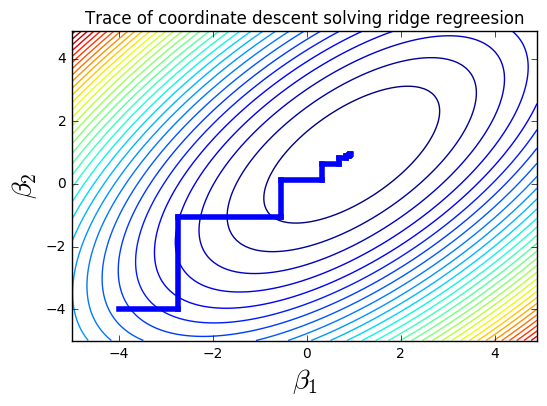

In [367]:
   
def objective(X,y,beta,alpha):
    return ( 0.5*np.sum((y - np.dot(X,beta)) **2.0) 
            + alpha/2.0*np.sum(beta**2.0) )

def update(X,y,beta,alpha,k):      
    beta[k] = 0        
    y_k = y - np.dot(X,beta) # residual since beta[k]=0
    xk = X[:,[k]]    
    beta[k] = np.dot(y_k.T,xk)/(np.dot(xk.T,xk) +  alpha)    
    return beta
    
n = 10
p = 2
np.random.seed(1)
X = np.random.randn(n,p) 

y = 1.0*X[:,[0]]+1.0*X[:,[1]] + 0.1*np.random.randn(n,1)
bs = np.arange(-5,5,0.1)
draw_contours(bs,bs,lambda b: objective(X,y,b,0.1))

beta = np.asarray([[-4.],[-4.]])
for it in range(10):
    for k in range(2):
        beta_old = np.copy(beta)        
        beta = update(X,y,beta,0.1,k)  
        plt.plot([beta_old[0],beta[0]],
                 [beta_old[1],beta[1]],'b',linewidth=4)
        
plt.xlabel('$\\beta_1$',fontsize=20)
plt.ylabel('$\\beta_2$',fontsize=20)
plt.title('Trace of coordinate descent solving ridge regreesion')
        

# Coordinate descent observations

1. Update one variable at a time corresponds to axis aligned moves
2. Coordinate descent usually takes more steps than gradient descent, but each step is cheaper
3. Single coordinate step is typically cheaper to compute than full gradient
  * In the case of our updates, residuals do not need to recomputed from scratch
$$
\yy^{[-k]} = \yy^{[-j]} + \xx_j\beta^{\new}_j - \xx_k\beta^{\old}_k
$$
and denominator of the update is constant across iterations
$$
\beta^{\new}_k  =\frac{\xx_k^Ty_t^{[-k]}}{\xx_k^T\xx_k + \alpha}
$$

# Coordinate descent for $\ell_1$ penalized linear regression

We are again going to express objective as a function of a single variable

$$
L(\beta_1,..,\color{red}{\beta_k},..\beta_p) = \frac{1}{2}\underbrace{
\sum_{t=1}^n (y_t^{[-k]} - \color{red}{\beta_k}x_{tk})^2}_{\norm{\yy - \XX\bbeta}_2^2}+ 
 \lambda\left(\sum_{j\neq k} \abs{\beta_j} + \abs{\color{red}{\beta_k}}\right)
$$

However, absolute value is not differentiable -- derivative at zero does not exist.

# Coordinate descent for $\ell_1$ penalized linear regression

We still need to obtain a solution for
$$
\argmin_{\color{red}{\beta_k}} \sum_{t=1}^n (y_t^{[-k]} - \color{red}{\beta_k}x_{tk})^2 + \lambda\abs{\color{red}{\beta_k}}
$$
To achieve this we will consider a simpler case
$$
\argmin \frac{1}{2}(y - \beta)^2 + \lambda\abs{\beta}
$$
We will show three facts


# Solving a simple $\ell_1$ penalized problem

Define $\beta^*$ to be minimizer of the objective:
$$
\beta^* = \argmin_{\beta} \frac{1}{2}(y - \beta)^2 + \lambda\abs{\beta}
$$

We will  show three facts:
1. $\beta^*\geq 0$ if $y \geq 0$
2. $\beta^* = y - \lambda$ if $y \geq \lambda$
3. $\beta^* = 0$ if $0 \leq y \leq \lambda$.
and then generalize them into a solution for $\beta^*$.

# $\beta^*$ never has opposite sign to $y$

Objective for reference:
$$
\argmin \frac{1}{2}(y - \beta)^2 + \lambda\abs{\beta}
$$

First, we show that the $\beta^*\geq 0$ if $y\geq 0$.

Suppose not, $\sign(\beta^*) \neq \sign(y)$, then objective is equal to 
$$
\frac{1}{2} (y +  \abs{\beta^*})^2 + \lambda\abs{\beta^*} > \frac{1}{2}y^2 + \lambda\abs{0}
$$
So, $\beta=0$ achieves a lower objective than $\beta^*$.
This contradicts definition of $\beta^*$ as minimizer.

Hence, $\sign(\beta^*) = \sign(y)$.

# $\beta^* = y-\lambda$ is optimal if $y\geq\lambda$

Objective for reference:
$$
\argmin \frac{1}{2}(y - \beta)^2 + \lambda\abs{\beta}
$$


Say $y\geq 0$, and $\beta^* \geq 0$ then $\abs{beta^*} = \beta^*$ and our original optimization problem is equivalent to
$$
\argmin_{\beta} \frac{1}{2}(y - \beta)^2 + \lambda\beta
$$
we can take derivative and equate it to zero in this case to obtain
$$
\beta^* = y - \lambda
$$
as long as $y \geq \lambda$. Otherwise, we violate the first observation.


# $\beta^* = 0$ is optimal if $0\leq y\leq\lambda$

Objective for reference:
$$
\argmin_\beta \frac{1}{2}(y - \beta)^2 + \lambda\abs{\beta}
$$

Let $y = \frac{\lambda}{c}$ for $c\geq 1$.
$$
\argmin_\beta \frac{1}{2}\left(\frac{\lambda}{c} - \beta\right)^2 + \lambda\beta
$$
Expanding the quadratic form and reorganizing terms yields
$$
\argmin_\beta \frac{1}{2}\frac{\lambda^2}{c^2} + \lambda\left(1 - \frac{1}{c}\right)\beta + \frac{1}{2}\beta^2
$$
Since $c\geq 1$, $1 - \frac{1}{c}>0$. Hence all terms involving $\beta$ grow as $\beta$ gets larger (and we know it is positive). The optimal $\beta^*$ is 0.


# Recap of things we have shown

For objective
$$
\argmin_\beta \frac{1}{2}(y - \beta)^2 + \lambda\abs{\beta}
$$
We have shown:
1. $\beta^*\geq 0$ if $y \geq 0$
2. $\beta^* = y - \lambda$ if $y \geq \lambda$
3. $\beta^* = 0$ if $0 \leq y \leq \lambda$.


Analogously we can show:
1. $\beta^*\leq 0$ if $y \leq 0$
2. $\beta^* = y + \lambda$ if $y \geq -\lambda$
3. $\beta^* = 0$ if $0 \geq y \geq -\lambda$.

Using these observations we obtain a closed form solution.

# Shrinkage and thresholding operator

For objective
$$
\argmin_\beta \frac{1}{2}(y - \beta)^2 + \lambda\abs{\beta}
$$
the optimizer is
$$
\beta^* = S(y,\lambda) = \underbrace{\sign(y)\underbrace{\max(\overbrace{\abs{y}-\lambda}^{\textrm{shrinkage}},0)}_{\textrm{Threshold}}}_{\textrm{Shrinkage and Thresholding Operator}}
$$


# Let's put it to use 

Using shrinkage and thresholding operator
$$
S(y,\lambda) = \sign(y)\max(\abs{y}-\lambda,0)
$$
Coordinate descent update for LASSO:
$$
\beta_k^\new = S\left(\frac{\xx_k^Ty_t^{[-k]}}{\xx_k^T\xx_k},\lambda\right)
$$

In words: shrink regression weight by $\lambda$, if it switches sign set it to zero.

Hence, each update has capability of setting a regression weight **exactly** to zero.

(10L, 1L)


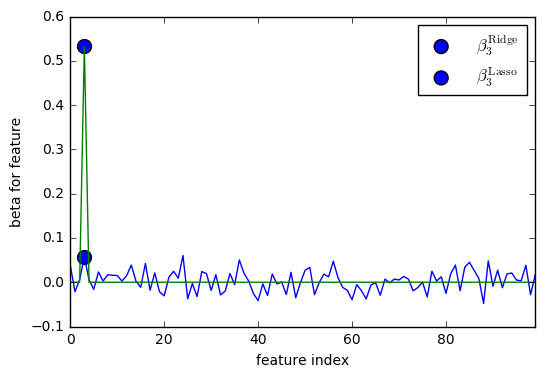

In [108]:
# a toy example
from sklearn.linear_model import Ridge, Lasso
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)
n = 10
p = 100
X = np.random.randn(n,p)
# use fourth feature
y = 1.0*X[:,[3]] + 0.2*np.random.randn(n,1)
print y.shape


# objective is 1/2*||y - X*beta||^2 + alpha||beta||^2
model = Ridge(alpha=1)
model.fit(X,y)
betas = model.coef_[0]
plt.plot(betas)
plt.scatter(3,betas[3],s=100,label=' $\\beta^{\mathrm{Ridge}}_3$ ')

model2 = Lasso(alpha=0.3)
model2.fit(X,y)
betas2 = model2.coef_
plt.plot(betas2)
plt.scatter(3,betas2[3],s=100,label=' $\\beta^{\mathrm{Lasso}}_3$ ')

plt.xlabel('feature index')
plt.ylabel('beta for feature');
plt.xlim([0,p-1])
plt.legend(scatterpoints = 1)


# Covered today

1. Sparsity
2. Ridge does not promote sparsity
3. Coordinate descent algorithms 
4. $\ell_1$ penalty and LASSO regression
5. Shrinkage and thresholding operator